In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
# Importing Data set
df= pd.read_csv("https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv")

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
X= df.drop("Chance of Admit ",axis= 1)

In [9]:
X

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1
496,497,337,117,5,5.0,5.0,9.87,1
497,498,330,120,5,4.5,5.0,9.56,1
498,499,312,103,4,4.0,5.0,8.43,0


In [10]:
y= df["Chance of Admit "]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.33,random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler= StandardScaler()

In [15]:
X_train= scaler.fit_transform(X_train)

In [16]:
X_test= scaler.transform(X_test)

In [18]:
from sklearn.svm import SVR

In [19]:
svr_model= SVR()

In [20]:
svr_model.fit(X_train, y_train)

SVR()

In [21]:
svr_model.score(X_train,y_train)

0.8002696421631224

In [24]:
y_pred= svr_model.predict(X_test)

Text(0, 0.5, 'Test Predicted Data')

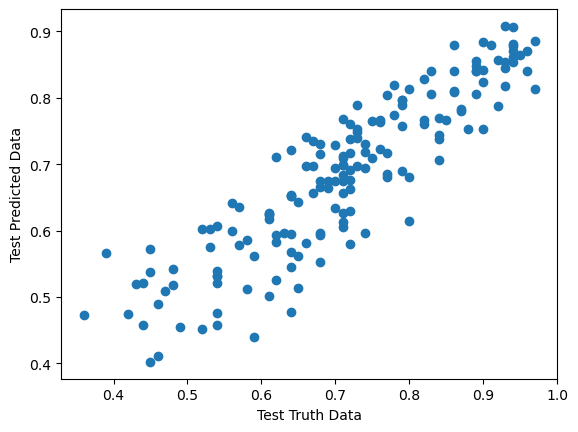

In [29]:
plt.scatter(y_test, y_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [30]:
residual = y_test - y_pred

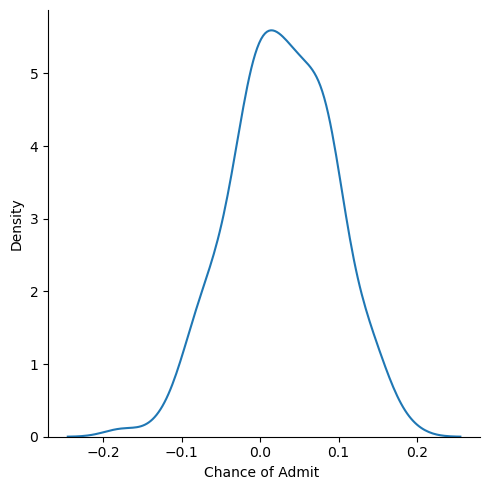

In [33]:
sns.displot(residual, kind="kde")

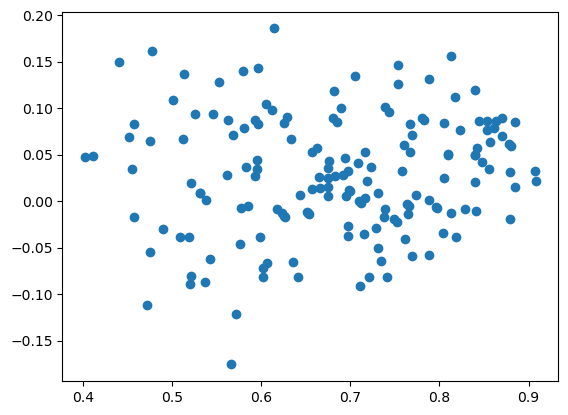

In [34]:
plt.scatter(y_pred,residual)

In [37]:
# Performance Metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("MSE is", mean_squared_error(y_test,y_pred))
print("MAE is",mean_absolute_error(y_test,y_pred))
print("RMSE is",np.sqrt(mean_squared_error(y_test,y_pred)))

MSE is 0.004878474514395206
MAE is 0.05626497201211845
RMSE is 0.06984607730141476


In [38]:
from sklearn.metrics import r2_score

In [41]:
score= r2_score(y_test,  y_pred)
print("R Square is", score)

R Square is 0.7632199437959383


In [42]:
#Adjusted R Square
print("Adjusted R Square is", 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Adjusted R Square is 0.7510773768111145
